# Predicting Breast Cancer

In [20]:
#Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [21]:
#Load the data
cancer = pd.read_csv("Cancer.csv")

In [22]:
cancer.head(5)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [23]:
cancer.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

In [24]:
# Check value count of "diagnosis"
cancer["diagnosis"].value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

In [25]:
# Convert B and M to numerical values for ML
cancer['diagnosis'] = cancer['diagnosis'].map({'M': 1, 'B': 0})

In [26]:
cancer.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [27]:
# Check info of data and whether we have null values
cancer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    int64  
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [28]:
cancer.describe()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,3.037183e+07,0.372583,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,0.483918,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,0.000000,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,0.000000,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,0.000000,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,1.000000,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,9.113205e+08,1.000000,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


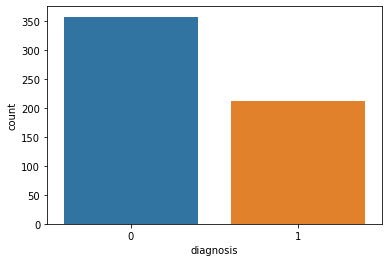

In [29]:
#Visualize diagnosis M:1 B:0, most are benign
sns.countplot(cancer["diagnosis"])

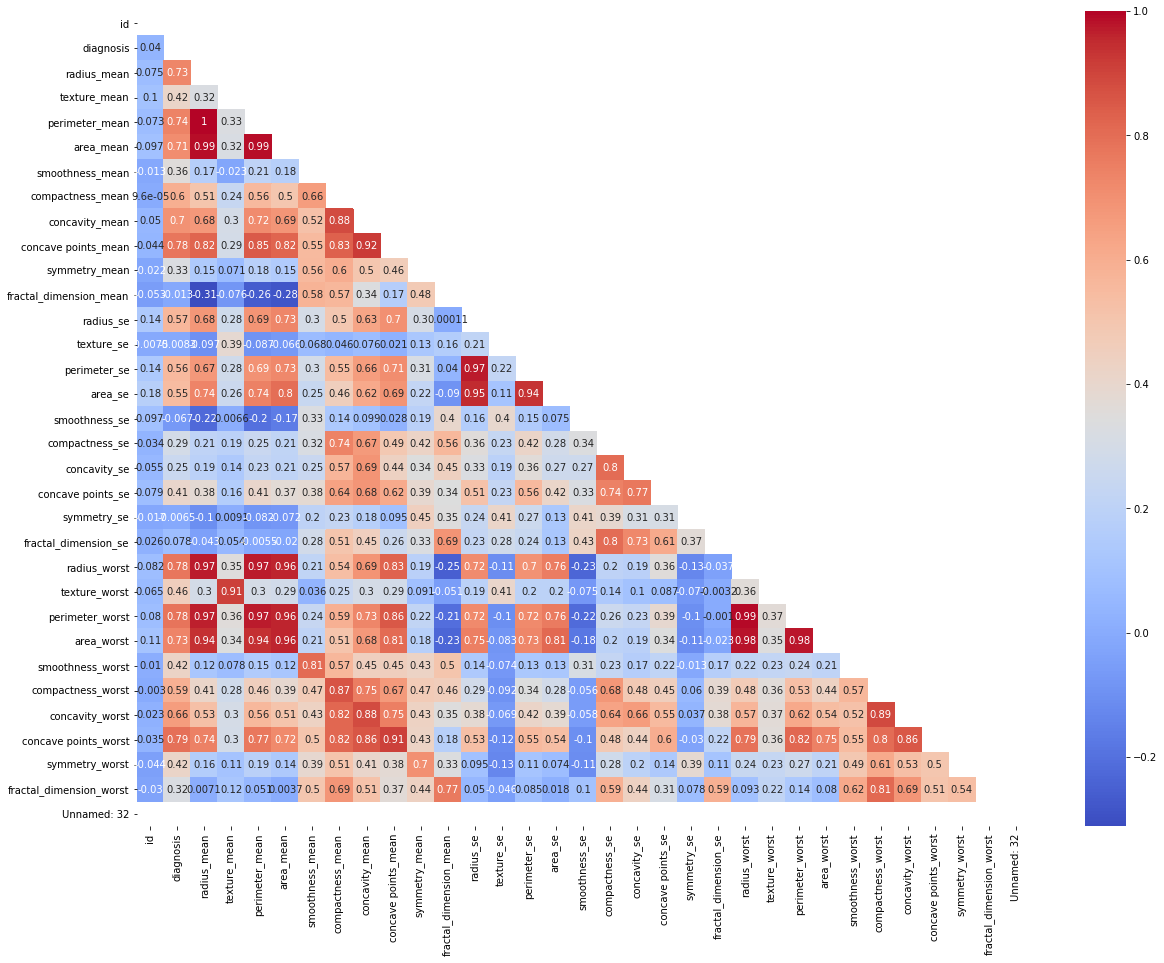

In [37]:
# correlation of the different features
fig, ax = plt.subplots(figsize=(20,15)) 
corr = np.triu(cancer.corr())
sns.heatmap(cancer.corr(), annot = True, cmap = "coolwarm", mask = corr)

Area, perimeter, compactness, concavity, compactness, concave points, and Radius, show the highest correlation with cancer diagnosis above 0.5
We will use these to build ML models

In [54]:
#Splitting into dependent and independent variable
X = cancer[['radius_mean', 'perimeter_mean', 'area_mean', 'compactness_mean', 'concavity_mean','concave points_mean']]
y = cancer["diagnosis"]

In [55]:
#Import libraries to split into test and train
from sklearn.model_selection import train_test_split

In [69]:
# Split into test and train 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 0)

In [70]:
#Create a function that takes in machil=ne learning models
def models(X_train, y_train):
    #Logistic regression
    from sklearn.linear_model import LogisticRegression
    lr = LogisticRegression(random_state=0)
    lr.fit(X_train, y_train)
    
    #KNN
    from sklearn.neighbors import KNeighborsClassifier
    knn = KNeighborsClassifier(n_neighbors=5, metric = 'minkowski', p = 2)
    knn.fit(X_train, y_train)
    
    #Use SVC (Linear kernel)
    from sklearn.svm import SVC
    svc_lin = SVC(kernel = 'linear', random_state = 0)
    svc_lin.fit(X_train, y_train)
    
    #SVC (RBF kernel)
    from sklearn.svm import SVC
    svc_rbf = SVC(kernel = 'rbf', random_state = 0)
    svc_rbf.fit(X_train, y_train)
    
    #GaussianNB
    from sklearn.naive_bayes import GaussianNB
    gauss = GaussianNB()
    gauss.fit(X_train, y_train)
    
    #Decison tree
    from sklearn.tree import DecisionTreeClassifier
    tree = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
    tree.fit(X_train, y_train)
    
    #Random forest
    from sklearn.ensemble import RandomForestClassifier
    forest = RandomForestClassifier(n_estimators=10, criterion = 'entropy', random_state = 0)
    forest.fit(X_train, y_train)
    
    #Print training accuracy for each model
    print('[0]Logistic Regression training accuracy: ', lr.score(X_train, y_train))
    print('[1]KNN training accuracy: ', knn.score(X_train, y_train))
    print('[2]SVC(linear kernel) training accuracy: ', svc_lin.score(X_train, y_train))
    print('[3]SVC(rbf kernel) training accuracy: ', svc_rbf.score(X_train, y_train))
    print('[4]Gaussian NB training accuracy: ', gauss.score(X_train, y_train))
    print('[5]Decision tree training accuracy: ', tree.score(X_train, y_train))
    print('[6]Random forests training accuracy: ', forest.score(X_train, y_train))
    
    return lr, knn, svc_lin, svc_rbf, gauss, tree, forest

In [71]:
#Train all models
model = models(X_train, y_train)

[0]Logistic Regression training accuracy:  0.8944723618090452
[1]KNN training accuracy:  0.8944723618090452
[2]SVC(linear kernel) training accuracy:  0.9045226130653267
[3]SVC(rbf kernel) training accuracy:  0.8668341708542714
[4]Gaussian NB training accuracy:  0.914572864321608
[5]Decision tree training accuracy:  1.0
[6]Random forests training accuracy:  0.9899497487437185


In [72]:
#Confusion matrix and accuracy for all models
from sklearn.metrics import confusion_matrix

for i in range(len(model)):
    cm = confusion_matrix(y_test, model[i].predict(X_test))
    
    #Extract TN, FP, FN, TP
    TN, FP, FN, TP = confusion_matrix(y_test, model[i].predict(X_test)).ravel()
    score = (TP + TN)/ (TP + TN +FN + FP)
    print(cm)
    print('Model[{}] Testing Accuracy = "{}"'.format(i, score))
    print()

[[103   5]
 [ 10  53]]
Model[0] Testing Accuracy = "0.9122807017543859"

[[105   3]
 [ 12  51]]
Model[1] Testing Accuracy = "0.9122807017543859"

[[101   7]
 [  9  54]]
Model[2] Testing Accuracy = "0.9064327485380117"

[[106   2]
 [ 18  45]]
Model[3] Testing Accuracy = "0.8830409356725146"

[[99  9]
 [10 53]]
Model[4] Testing Accuracy = "0.8888888888888888"

[[98 10]
 [ 5 58]]
Model[5] Testing Accuracy = "0.9122807017543859"

[[102   6]
 [  5  58]]
Model[6] Testing Accuracy = "0.935672514619883"



In [73]:
# Importance of different features in model 6, Random Forest Classifier (Gives highest accuracy)
# From this information we can tell that one way of improving the model is by removing "compactness_mean" 
# from the classifiers
forest = model[6]
importances = pd.DataFrame({'feature': ['radius_mean', 'perimeter_mean', 'area_mean', 'compactness_mean',
                            'concavity_mean','concave points_mean'],
                           'importance': np.round(forest.feature_importances_, 3)})
importances = importances.sort_values('importance', ascending = False).set_index('feature')
importances

,importance
feature,
concave points_mean,0.272
concavity_mean,0.192
area_mean,0.173
perimeter_mean,0.171
radius_mean,0.141
compactness_mean,0.051


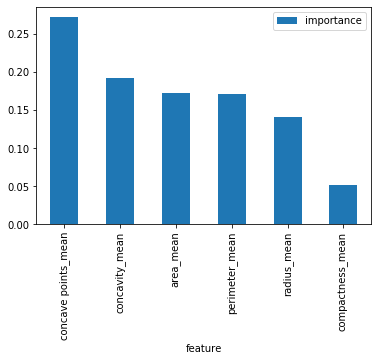

In [74]:
#Visualize importance
importances.plot.bar()